In [58]:
%load_ext autoreload
%autoreload 2

/home/jrowland/Documents/code/pop-off/popoff/popoff/loadpaths.py
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [59]:
import popoff
import loadpaths
from linear_model import PoolAcrossSessions
from Session import SessionLite

import matplotlib.pyplot as plt
import numpy as np

In [93]:
params = {'legend.fontsize': 'xx-large',
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}

plt.rc("axes.spines", top=False, right=False) # despine

plt.rcParams.update(params)

COLORS = [
'#228E5E', # Hit green
'#DB3713', # Miss red
]

In [60]:
# Do you want to remove all cells that were ever targetted from all future analysis?
remove_targets = False
# Do you want to just analyse the three 'training set' sessions ([0,3,7]) indexes hardcoded
# as keep_sessions variable in PoolAcrossSessions
subsample_sessions = True
# Set hits with first lick < 250ms as toosoon?
remove_toosoon = True
# Build the PoolAcrossSessions object
pas = PoolAcrossSessions(save_PCA=False, remove_targets=remove_targets, subsample_sessions=subsample_sessions,
                         remove_toosoon = remove_toosoon)

In [99]:
# pas contains a list of linear_model objects
linear_model = pas.linear_models[1]
# And this contains the session object
session = linear_model.session

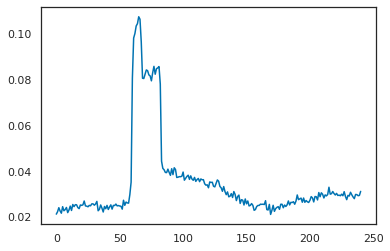

In [62]:
# Linear Model has the fluoresence data structure and indexing variables
plt.plot(np.mean(linear_model.flu, (0,1))) # All trials average with the artifact

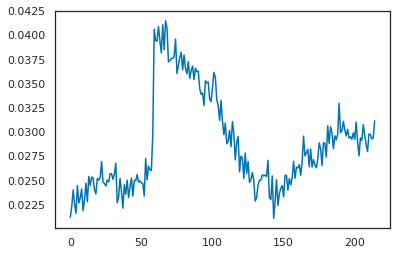

In [63]:
flu = linear_model.flu[:, :, linear_model.remove_artifact]  # With the artifact snipped out
plt.plot(np.mean(flu, (0,1)))   

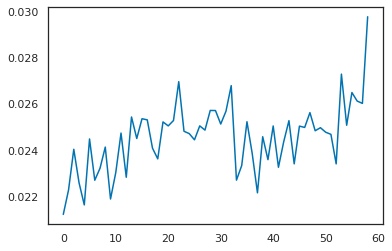

In [64]:
flu = linear_model.flu[:, :, linear_model.pre]  # Just the pre-frames
plt.plot(np.mean(flu, (0,1)))   

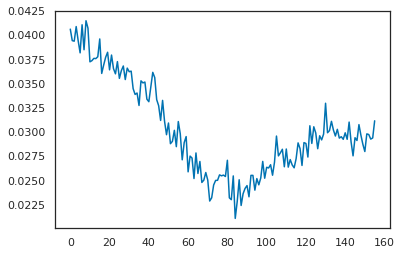

In [65]:
flu = linear_model.flu[:, :, linear_model.post]  # Just the post-frames
plt.plot(np.mean(flu, (0,1)))   

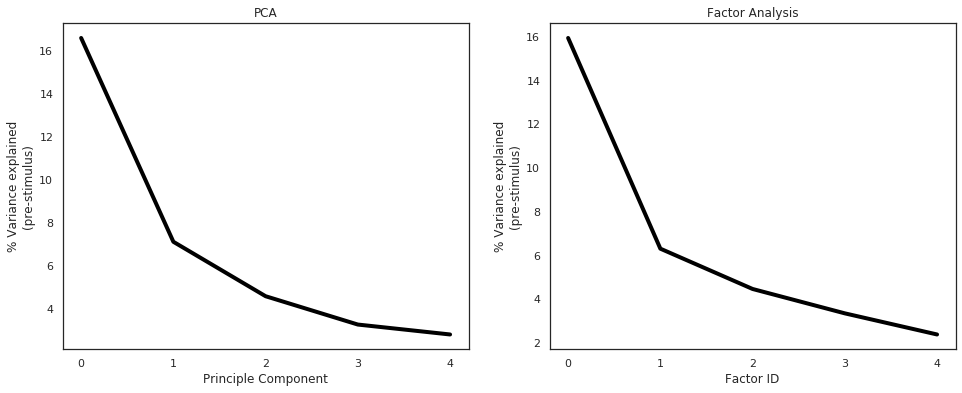

In [81]:
from linear_model import do_pca, do_fa
n_components = 5
trial = 10
matrix = session.behaviour_trials[:, :, trial]

plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.title('PCA')
do_pca(matrix, n_components=n_components, plot=True)
plt.subplot(1,2,2)
plt.title('Factor Analysis')
do_fa(matrix, n_components=n_components, plot=True)
    
    

Text(0, 0.5, '% variance explained\nby first component/factor')

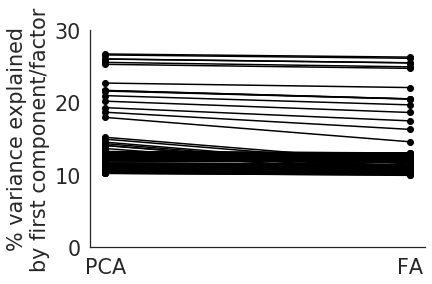

In [102]:
for trial in range(session.n_trials):
    
    matrix = session.behaviour_trials[:, :, trial]
    pca_var, _ = do_pca(matrix, 5, plot=False)
    fa_var, _ = do_fa(matrix, 5, plot=False)
    
    plt.plot([0,1], [pca_var[0]*100, fa_var[0]], color='black', marker='o')
    
plt.ylim(0, 30)
plt.xticks([0,1], ['PCA', 'FA'])
plt.ylabel('% variance explained\nby first component/factor')